# Parcheggi Diversamente Abili, Comune di Prato, Aggiornamento del 25/12/2020.

Fonte dati: http://odn.comune.prato.it/dataset/

#### Non lavoro per il Comune di Prato.

In [3]:
import requests
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
pd.set_option('mode.chained_assignment', None)

In [5]:
### Verifica richiesta dell'API ###
df = pd.read_csv('http://odn.comune.prato.it/dataset/634c11db-1216-4f6a-81eb-7010a1868f2f/resource/db7c5080-4c63-49a2-991e-b054d6210ac1/download/stallisostadivabili.csv', sep = ";") 
df

,CODICE,TIPO,TOPONIMO,NOTE,AUT_N,ORD_ISTIT,TIPOLOGIA,LATITUDINE,LONGITUDIN
0,41,Posto invalido riservato,"V.A.Benini, 17",NaN,12085,640/2019,Riservato,43.864750,11.084993
1,40,Posto invalido generico,"V.M.Cipriani, 7/H",NaN,-,424/2019,Generico,43.871885,11.083193
2,41,Posto invalido riservato,"V.Oglio, 16 - 18",NaN,12036,638/2019,Riservato,43.892812,11.088110
3,41,Posto invalido riservato,"V.Gobbi, 47/3 - 47/4",NaN,11994,277/2019,Riservato,43.889343,11.082410
4,41,Posto invalido riservato,"V.Fonti, 43",Integrazione,12726,4497/2018-3651/2019,Riservato,43.867505,11.108696
...,...,...,...,...,...,...,...,...,...
638,41,Posto invalido riservato,"V.Case Nuove, 8",Cambiato contrassegno da 4568 a 8530,8530,2653/2020,Riservato,43.885076,11.042793
639,41,Posto invalido riservato,"V.E.Caruso, 8",NaN,12150,2697/2020,Riservato,43.869089,11.100570
640,41,Posto invalido riservato,"V.V.Bellini, 31",NaN,12816,2698/2020,Riservato,43.887463,11.076130
641,41,Posto invalido riservato,"V.L.Cadorna, 6",trasformazione di stallo generico in riservato,11270,2699/2020,Riservato,43.883554,11.107156


# Quanti posti per disabili ci sono nel Comune di Prato?

In [6]:
len(df)

643

# Quanti generici e quanti Riservati?

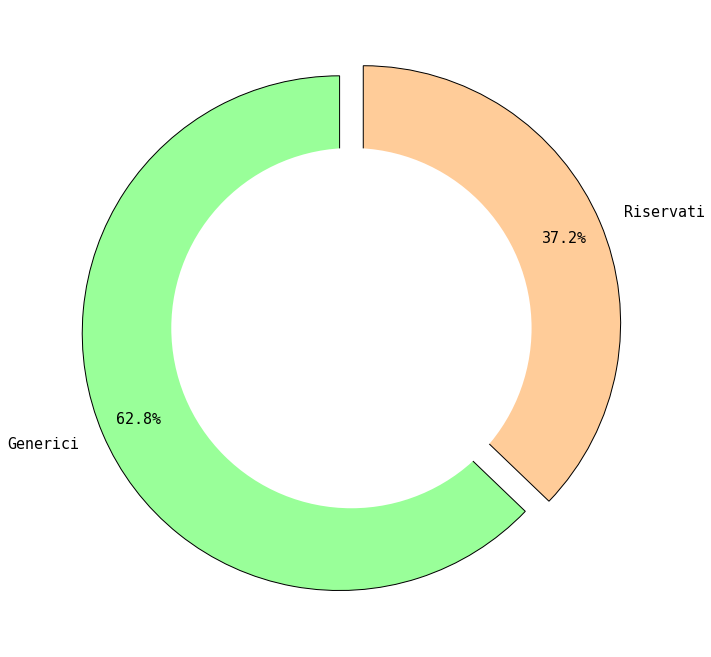

In [11]:
df_generici = df[df["TIPOLOGIA"] == "Generico"]
generici = len(df_generici)
df_riservati = df[df["TIPOLOGIA"] == "Riservato"]
riservati = len(df_riservati)
labels = ["Generici", "Riservati"]
sizes = [generici, riservati]
#colors
colors = ['#99ff99','#ffcc99']
#explsion
explode = (0.05,0.05)

plt.figure(figsize = (10,10))
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85,
        explode = explode, textprops={'size': 15, "family": "monospace"},
        wedgeprops={"edgecolor":"k",'linewidth': 1, 'antialiased': True})

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

In [16]:
df_dropna = df.dropna()
df_dropna['NOTE']

4                                        Integrazione
23                                           2 stalli
24                                           2 stalli
28                                           4 stalli
29                                           4 stalli
                            ...                      
604                                          2 stalli
605                                          2 stalli
620                           da Riservato a Generico
638              Cambiato contrassegno da 4568 a 8530
641    trasformazione di stallo generico in riservato
Name: NOTE, Length: 90, dtype: object